[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Nov 16 16:57:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| 30%   27C    P8             22W /  220W |    1332MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\Alex\Desktop\Dial Detection


## Install YOLO11 via Ultralytics

In [ ]:
#%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.32  Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
Setup complete  (24 CPUs, 31.1 GB RAM, 724.7/930.6 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 5.35M/5.35M [00:00<00:00, 95.9MB/s]
WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 44.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 61.4ms
Speed: 11.7ms 

**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

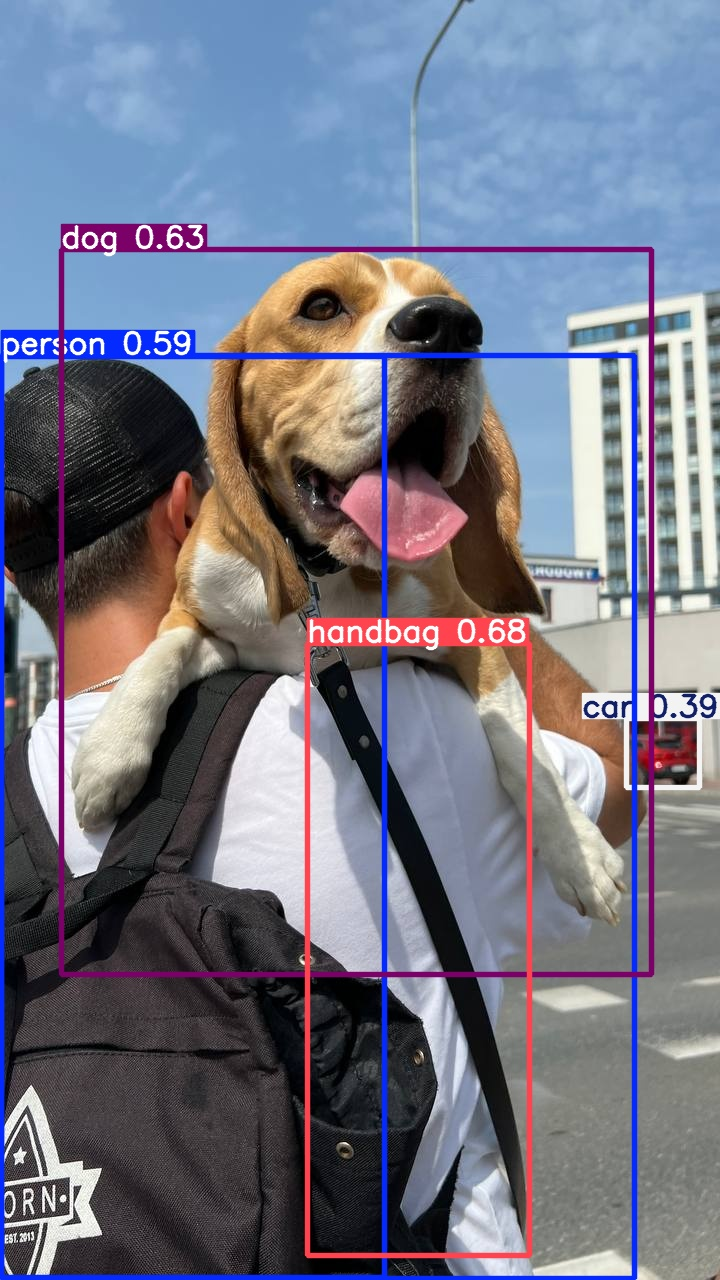

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpeg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 60.1ms
Speed: 3.9ms preprocess, 60.1ms inference, 924.2ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
result.boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([26., 16.,  0.,  0.,  2.], device='cuda:0')

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

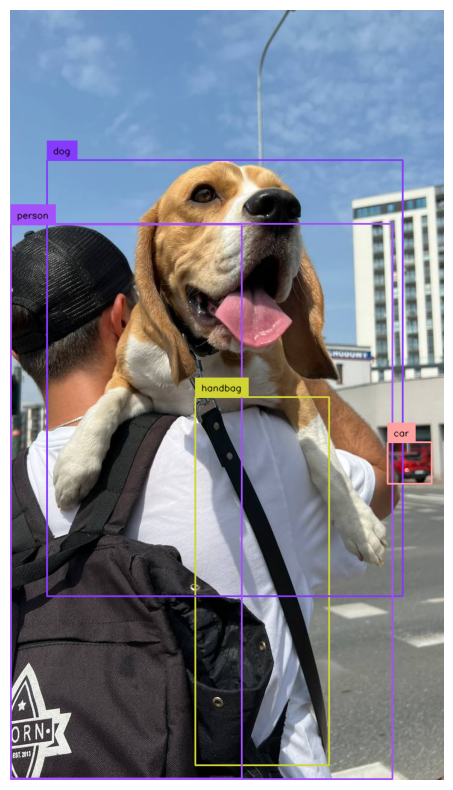

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [23]:
os.chdir("C:/Users/Alex/Desktop/Dial Detection")

In [1]:
from roboflow import Roboflow
import os

with open('ROBOFLOW_API_KEY.txt', 'r') as file:
    ROBOFLOW_API_KEY = file.read()

path = "datasets"

#os.mkdir(path)

os.chdir(path)

rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("seniordesign-neufu")
project = workspace.project("dials-3dlwi")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [3]:
from ultralytics import YOLO
import torch
import os

home_dir = "C:/Users/Alex/Desktop/Dial Detection"

os.chdir(home_dir)
print(os.getcwd())

#!yolo task=detect mode=train model=yolo11x.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

model = YOLO('yolo11x.pt')
model.train(data=dataset.location + "/data.yaml", epochs=100, imgsz=640, batch=0.8, project="saved_models", name="m", plots=True)

C:\Users\Alex\Desktop\Dial Detection
Ultralytics 8.3.32  Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolo11x.pt, data=c:\Users\Alex\Desktop\Dial Detection\datasets\Dials-2/data.yaml, epochs=100, time=None, patience=100, batch=0.8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=saved_models, name=m12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

train: Scanning C:\Users\Alex\Desktop\Dial Detection\datasets\Dials-2\train\labels... 785 images, 3 backgrounds, 0 corrupt: 100%|██████████| 785/785 [00:00<00:00, 1443.42it/s]

train: New cache created: C:\Users\Alex\Desktop\Dial Detection\datasets\Dials-2\train\labels.cache


AutoBatch: Computing optimal batch size for imgsz=640 at 80.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4070 SUPER) 11.99G total, 0.48G reserved, 0.47G allocated, 11.04G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    56877241       195.5         1.567          45.4         59.49        (1, 3, 640, 640)                    list
    56877241       390.9         2.538         46.31         45.31        (2, 3, 640, 640)                    list
    56877241       781.8         4.456         72.81         55.51        (4, 3, 640, 640)                    list
    56877241        1564         8.145         126.4         90.76        (8, 3, 640, 640)                    list
    56877241        3127        15.739          1339         939.1       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 8 for CUDA:0 9.14G/11.99G (76%) 


train: Scanning C:\Users\Alex\Desktop\Dial Detection\datasets\Dials-2\train\labels.cache... 785 images, 3 backgrounds, 0 corrupt: 100%|██████████| 785/785 [00:00<?, ?it/s]
val: Scanning C:\Users\Alex\Desktop\Dial Detection\datasets\Dials-2\valid\labels... 75 images, 1 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 618.76it/s]

val: New cache created: C:\Users\Alex\Desktop\Dial Detection\datasets\Dials-2\valid\labels.cache


Plotting labels to saved_models\m12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to saved_models\m12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.29G       1.41      1.456      1.567          3        640: 100%|██████████| 99/99 [00:25<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]

                   all         75        215      0.381      0.164     0.0826     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       9.1G      1.373     0.9299      1.558          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.53it/s]

                   all         75        215      0.381      0.164     0.0826     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.11G      1.372     0.9298      1.567          6        640: 100%|██████████| 99/99 [00:22<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]

                   all         75        215      0.631      0.427      0.503      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.07G       1.37     0.8664      1.564          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.48it/s]

                   all         75        215      0.358      0.803      0.343      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.12G      1.295     0.7656      1.504          8        640: 100%|██████████| 99/99 [00:22<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.77it/s]

                   all         75        215      0.976      0.989      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.12G      1.258     0.7399      1.475          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]

                   all         75        215      0.602      0.649      0.633      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       9.1G      1.229     0.6908      1.452          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]

                   all         75        215      0.976          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.08G      1.207      0.682      1.447          2        640: 100%|██████████| 99/99 [00:22<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]

                   all         75        215      0.994      0.995      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.11G      1.205     0.6469      1.415          4        640: 100%|██████████| 99/99 [00:22<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]

                   all         75        215      0.973      0.951      0.973      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       8.9G      1.171     0.6404      1.416          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.92it/s]

                   all         75        215      0.989      0.958      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.11G      1.172     0.6022      1.399          1        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all         75        215      0.997          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.09G      1.119     0.5879      1.368          6        640: 100%|██████████| 99/99 [00:23<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all         75        215      0.981      0.972      0.992      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.13G       1.11      0.589      1.365          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all         75        215      0.998          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       9.1G       1.13     0.5821      1.374          7        640: 100%|██████████| 99/99 [00:23<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all         75        215      0.999          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.11G      1.103     0.5715      1.371          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all         75        215      0.993          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.12G      1.126     0.5661       1.37          4        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

                   all         75        215      0.996          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.11G      1.153     0.5743      1.395          2        640: 100%|██████████| 99/99 [00:23<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]

                   all         75        215      0.978      0.974      0.985      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       8.9G      1.121     0.5422      1.383          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]

                   all         75        215      0.998          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       9.1G      1.055     0.5188      1.341          8        640: 100%|██████████| 99/99 [00:22<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]

                   all         75        215      0.998          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.07G       1.11     0.5359      1.363          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all         75        215      0.998      0.999      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.13G      1.106     0.5443      1.362         12        640: 100%|██████████| 99/99 [00:22<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.97it/s]

                   all         75        215      0.999          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.09G      1.068     0.4929      1.329         10        640: 100%|██████████| 99/99 [00:22<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]

                   all         75        215      0.994          1      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.11G      1.084     0.5153      1.345          5        640: 100%|██████████| 99/99 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.97it/s]

                   all         75        215      0.998          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.09G       1.05     0.4894      1.315          2        640: 100%|██████████| 99/99 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]

                   all         75        215      0.996          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       9.1G      1.076     0.5006      1.348          9        640: 100%|██████████| 99/99 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        215      0.993          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       8.9G      1.059     0.4913      1.326          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all         75        215      0.998          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       9.1G      1.024     0.4766      1.312          2        640: 100%|██████████| 99/99 [00:22<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.05it/s]

                   all         75        215      0.999          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.08G      1.049     0.4896      1.322          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]

                   all         75        215      0.998          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.11G      1.081     0.4897      1.344          4        640: 100%|██████████| 99/99 [00:22<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]

                   all         75        215      0.997          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.11G      1.027     0.4686      1.318          5        640: 100%|██████████| 99/99 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         75        215      0.999          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       9.1G      1.057     0.4818      1.338          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]

                   all         75        215      0.981      0.991      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.12G      1.052     0.4794      1.329          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]

                   all         75        215          1      0.509      0.738      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.11G      1.033     0.4569      1.305          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        215      0.996          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       8.9G      1.016     0.4492      1.303          8        640: 100%|██████████| 99/99 [00:22<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all         75        215      0.993          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       9.1G      1.002     0.4552      1.283          7        640: 100%|██████████| 99/99 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        215      0.996          1      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.09G      1.029     0.4562      1.303          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]

                   all         75        215      0.994          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.11G      1.021     0.4508      1.306          2        640: 100%|██████████| 99/99 [00:22<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

                   all         75        215      0.999          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.09G     0.9934     0.4338        1.3          4        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.77it/s]

                   all         75        215      0.997          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.11G       1.01     0.4528      1.296          5        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all         75        215      0.994          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       9.1G     0.9813     0.4429      1.256          1        640: 100%|██████████| 99/99 [00:22<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]

                   all         75        215      0.994          1      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.11G     0.9889     0.4521      1.286          7        640: 100%|██████████| 99/99 [00:23<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]

                   all         75        215      0.996      0.999      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.89G     0.9991     0.4434      1.283          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.82it/s]

                   all         75        215      0.998          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.11G      1.005     0.4482      1.296         12        640: 100%|██████████| 99/99 [00:22<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all         75        215      0.997      0.996      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       9.1G     0.9667     0.4279      1.242          2        640: 100%|██████████| 99/99 [00:23<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.82it/s]

                   all         75        215      0.997          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.12G     0.9685     0.4214      1.261          6        640: 100%|██████████| 99/99 [00:22<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.78it/s]

                   all         75        215      0.997          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.11G     0.9587     0.4181      1.275          7        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all         75        215      0.998          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       9.1G     0.9437     0.4572      1.236          0        640: 100%|██████████| 99/99 [00:22<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all         75        215      0.999          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.09G     0.9545     0.4029      1.257          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all         75        215      0.994          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.12G     0.9529     0.4158      1.246          4        640: 100%|██████████| 99/99 [00:22<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

                   all         75        215      0.994          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.97G     0.9629     0.4215      1.269         10        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all         75        215      0.994          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       9.1G     0.9812     0.4176      1.282          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all         75        215      0.998          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.07G     0.9516     0.4014       1.24          6        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]

                   all         75        215      0.999          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.11G     0.9557     0.4027      1.256          4        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all         75        215      0.996      0.999      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       9.1G     0.9416     0.4016      1.258          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]

                   all         75        215      0.997          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.12G     0.9211     0.3965      1.234          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

                   all         75        215      0.998          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.11G      0.942     0.4033      1.248          6        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all         75        215      0.998          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       9.1G     0.9467     0.3981      1.252          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all         75        215      0.998          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.89G     0.9389     0.3965      1.236          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all         75        215      0.999          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       9.1G     0.9336     0.3995      1.241          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.83it/s]

                   all         75        215      0.996          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.07G     0.9231     0.3935      1.232          5        640: 100%|██████████| 99/99 [00:22<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.80it/s]

                   all         75        215      0.996          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.11G     0.9205     0.3916      1.227          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]

                   all         75        215      0.995          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.13G     0.9074      0.392      1.228          1        640: 100%|██████████| 99/99 [00:23<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]

                   all         75        215      0.995          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.12G     0.9274     0.3921      1.234          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        215      0.994          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.11G     0.9134      0.388      1.233          9        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]

                   all         75        215      0.994          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.11G      0.895     0.3809      1.199          5        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]

                   all         75        215      0.996          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       8.9G      0.885     0.3733      1.211          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all         75        215      0.999          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.11G     0.8896     0.3775      1.234          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]

                   all         75        215      0.996          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.08G     0.8804     0.3655      1.204         10        640: 100%|██████████| 99/99 [00:23<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]

                   all         75        215      0.997          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.12G     0.9048     0.3799      1.206          1        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all         75        215      0.998          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       9.1G     0.8585     0.3919       1.17          0        640: 100%|██████████| 99/99 [00:23<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all         75        215      0.998          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       9.1G     0.8654     0.3546        1.2          8        640: 100%|██████████| 99/99 [00:23<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all         75        215      0.997          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       9.1G     0.8754     0.3777      1.195         12        640: 100%|██████████| 99/99 [00:23<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.75it/s]

                   all         75        215      0.999      0.999      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.09G     0.8667      0.365      1.195          8        640: 100%|██████████| 99/99 [00:23<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]

                   all         75        215      0.998          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       8.9G     0.8503     0.3587      1.187          5        640: 100%|██████████| 99/99 [00:22<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.85it/s]

                   all         75        215      0.999          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.11G     0.8567     0.3552      1.182          5        640: 100%|██████████| 99/99 [00:23<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.82it/s]

                   all         75        215      0.998          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.06G     0.8437     0.3529      1.186          4        640: 100%|██████████| 99/99 [00:22<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]

                   all         75        215      0.998          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.11G       0.87     0.3563      1.203          1        640: 100%|██████████| 99/99 [00:22<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.80it/s]

                   all         75        215      0.998      0.999      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.11G     0.8472     0.3546      1.195          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all         75        215      0.998          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.11G      0.849     0.3444      1.177         10        640: 100%|██████████| 99/99 [00:24<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all         75        215      0.998          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.11G     0.8417      0.342      1.167         10        640: 100%|██████████| 99/99 [00:23<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all         75        215      0.994          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       9.1G     0.8331     0.3498      1.184          1        640: 100%|██████████| 99/99 [00:23<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]

                   all         75        215      0.997      0.995      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.93G     0.8321     0.3475      1.163          6        640: 100%|██████████| 99/99 [00:23<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all         75        215      0.993          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.11G     0.8236     0.3371      1.164          5        640: 100%|██████████| 99/99 [00:23<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all         75        215      0.993          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.08G     0.8234     0.3421      1.175          7        640: 100%|██████████| 99/99 [00:23<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]

                   all         75        215      0.992          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.11G     0.8124     0.3377      1.157          0        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.82it/s]

                   all         75        215      0.997      0.995      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.11G     0.8022     0.3305      1.152          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.78it/s]

                   all         75        215      0.997      0.995      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.14G     0.8194     0.3394      1.167         12        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all         75        215      0.998      0.995      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       9.1G     0.8043     0.3319      1.143          7        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all         75        215      0.998          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.08G     0.7978     0.3334      1.144          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]

                   all         75        215      0.998      0.999      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       8.9G      0.809     0.3335      1.148          4        640: 100%|██████████| 99/99 [00:23<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all         75        215      0.997      0.995      0.995      0.836


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       9.1G     0.7725     0.2945      1.222          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.51it/s]

                   all         75        215      0.998      0.995      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.06G     0.7696     0.2911      1.233          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all         75        215      0.998      0.995      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.15G     0.7684     0.2894      1.217          2        640: 100%|██████████| 99/99 [00:23<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.49it/s]

                   all         75        215      0.992          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.13G     0.7464     0.2848      1.207          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all         75        215      0.995      0.995      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.11G     0.7545     0.2851      1.216          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all         75        215      0.993      0.995      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.11G     0.7407     0.2806        1.2          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]

                   all         75        215      0.993      0.995      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.13G     0.7453     0.2827      1.201          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all         75        215      0.994      0.996      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.96G     0.7404     0.2795      1.192          3        640: 100%|██████████| 99/99 [00:22<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all         75        215      0.992          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.11G     0.7328     0.2756      1.188          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all         75        215      0.992          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.07G      0.735     0.2758      1.186          3        640: 100%|██████████| 99/99 [00:23<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.75it/s]

                   all         75        215      0.992      0.999      0.995       0.84



100 epochs completed in 0.705 hours.
Optimizer stripped from saved_models\m12\weights\last.pt, 114.4MB
Optimizer stripped from saved_models\m12\weights\best.pt, 114.4MB

Validating saved_models\m12\weights\best.pt...
Ultralytics 8.3.32  Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
YOLO11x summary (fused): 464 layers, 56,830,489 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]


                   all         75        215      0.997          1      0.995      0.847
              airspeed         74         74      0.999          1      0.995      0.847
              altitude         73         73      0.999          1      0.995      0.849
                   rpm         68         68      0.994          1      0.995      0.845
Speed: 0.2ms preprocess, 9.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to saved_models\m12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B73093D310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
#print(home_dir + "/runs/detect/train/")

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1727788453.c5dcf32815d2.3299.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [7]:
import os

# Method written by bing copliot
def get_newest_directory(path):
    # List all directories in the given path
    directories = [os.path.join(path, d) for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    
    # Sort directories by creation time
    newest_directory = max(directories, key=os.path.getctime)
    
    return newest_directory

# Example usage
path = home_dir + '/saved_models/'
path = get_newest_directory(path)

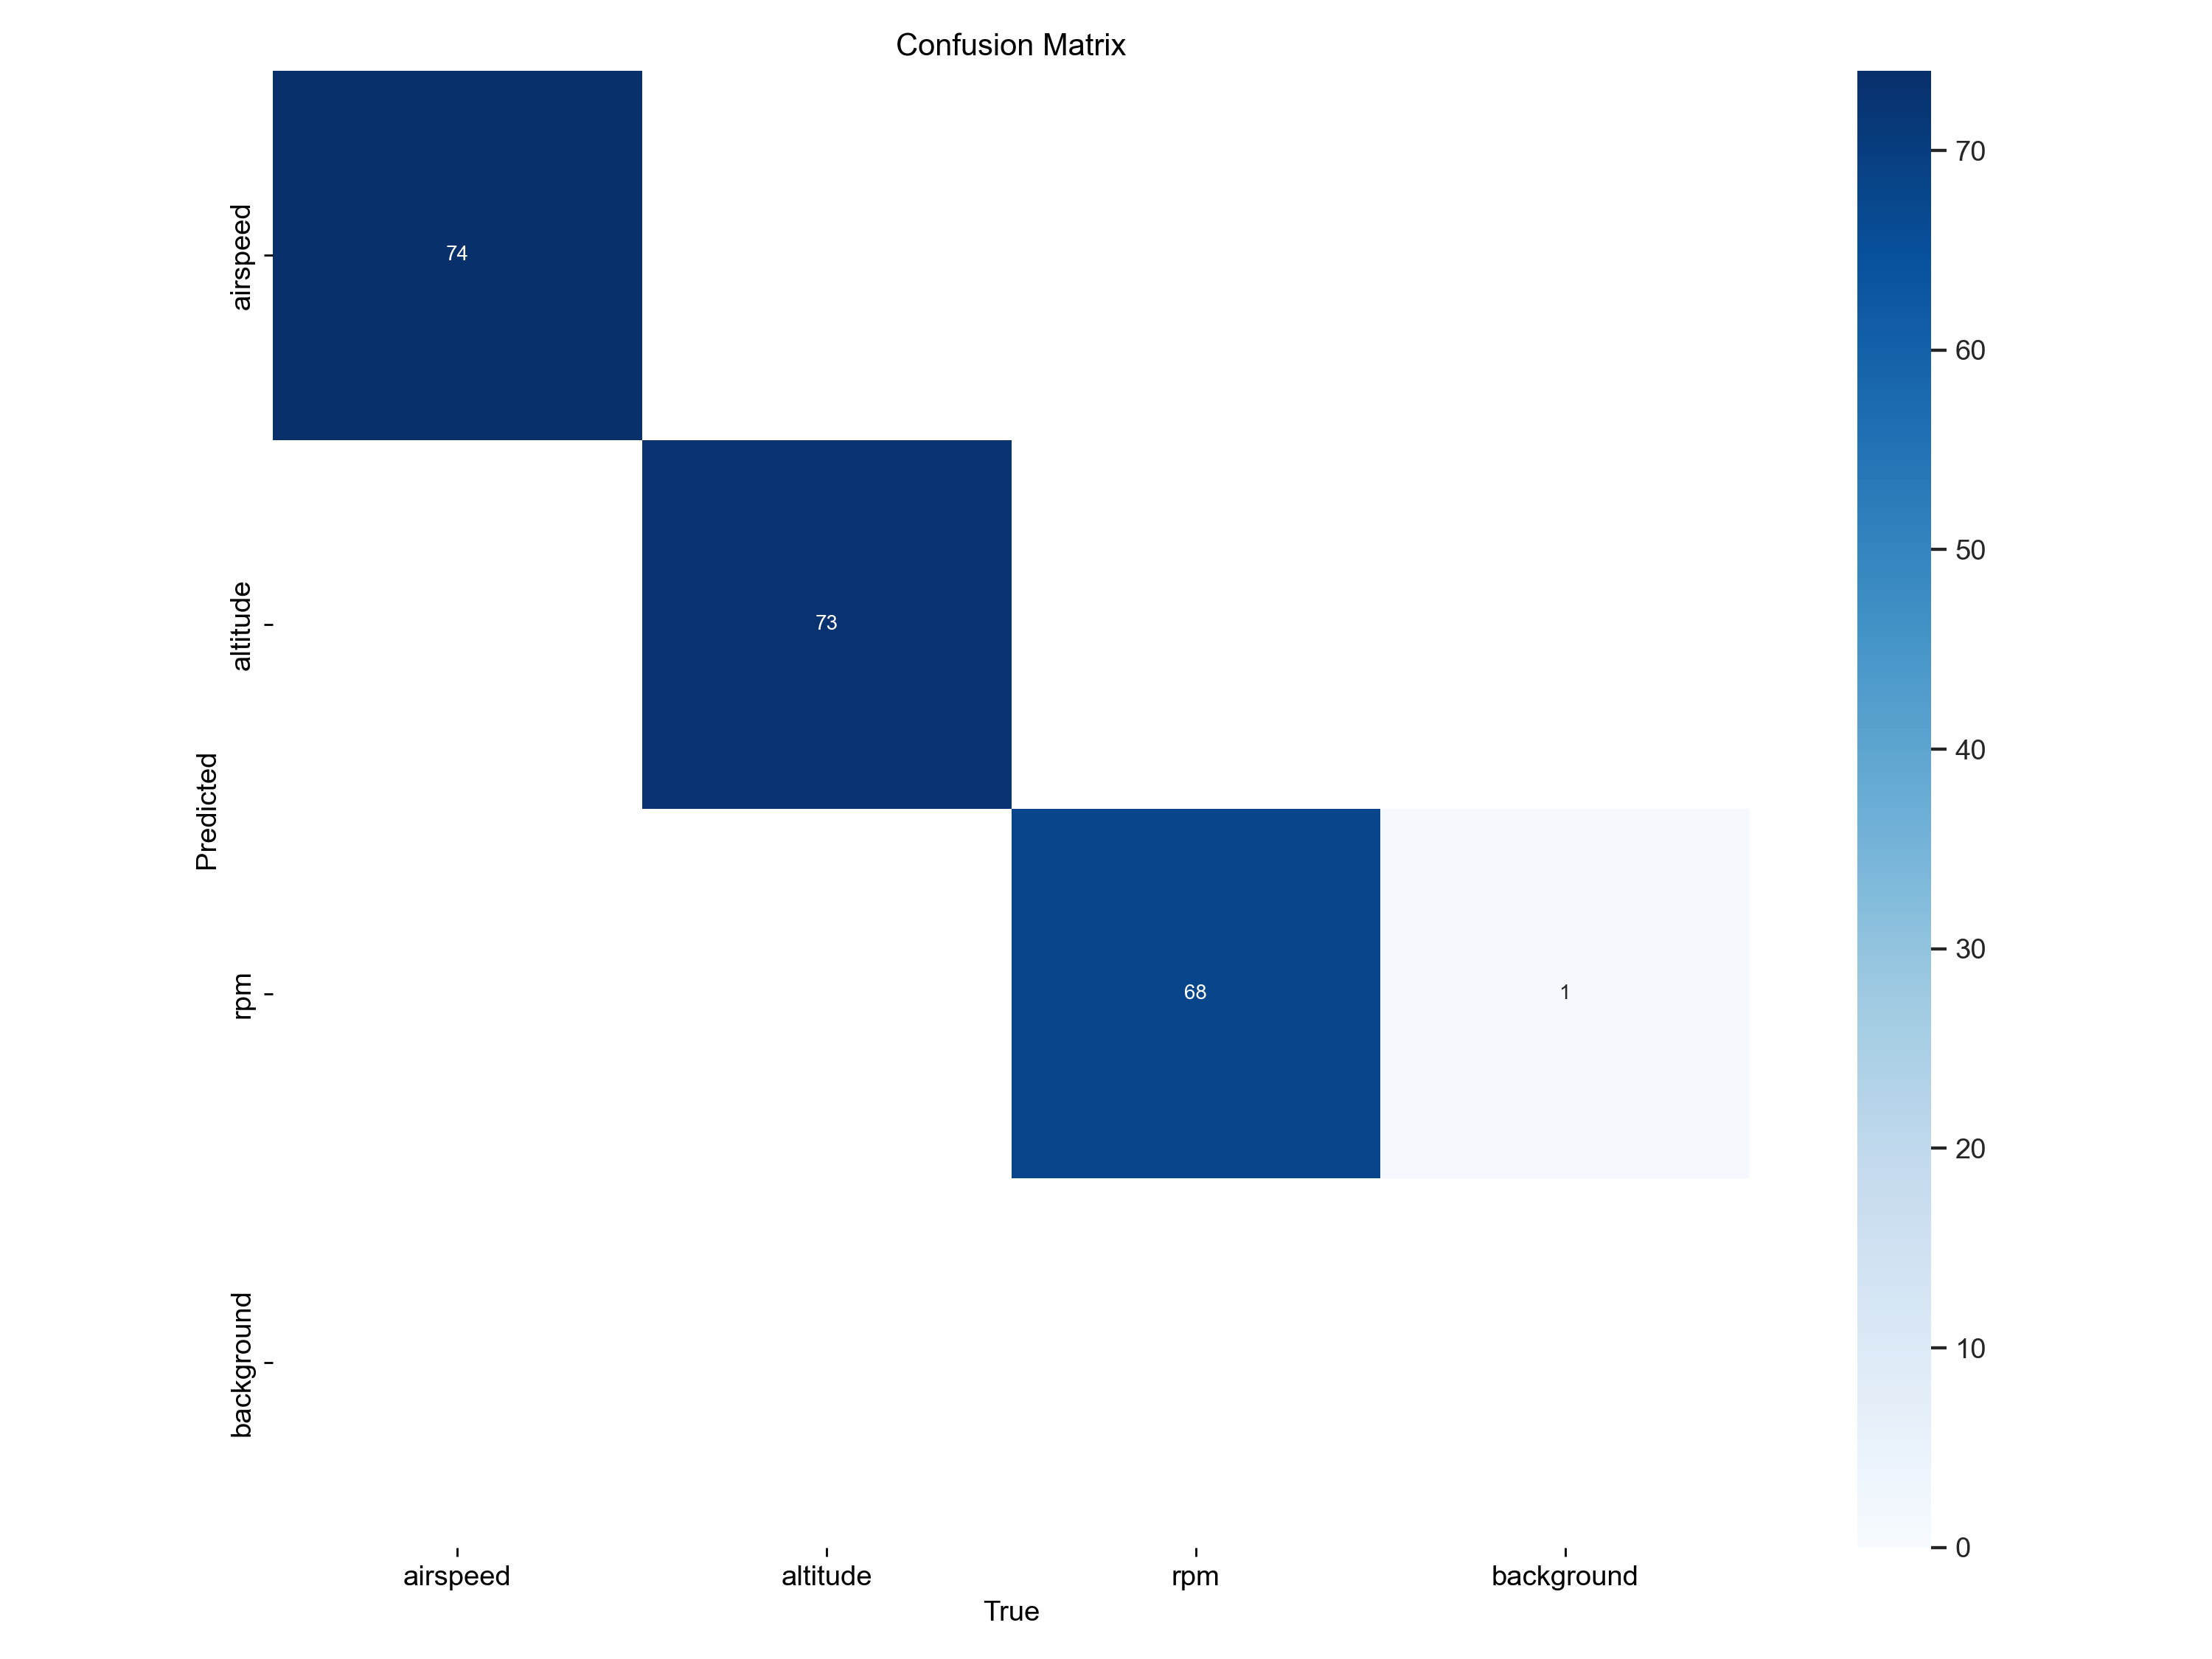

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=path + '/confusion_matrix.png' , width=600)

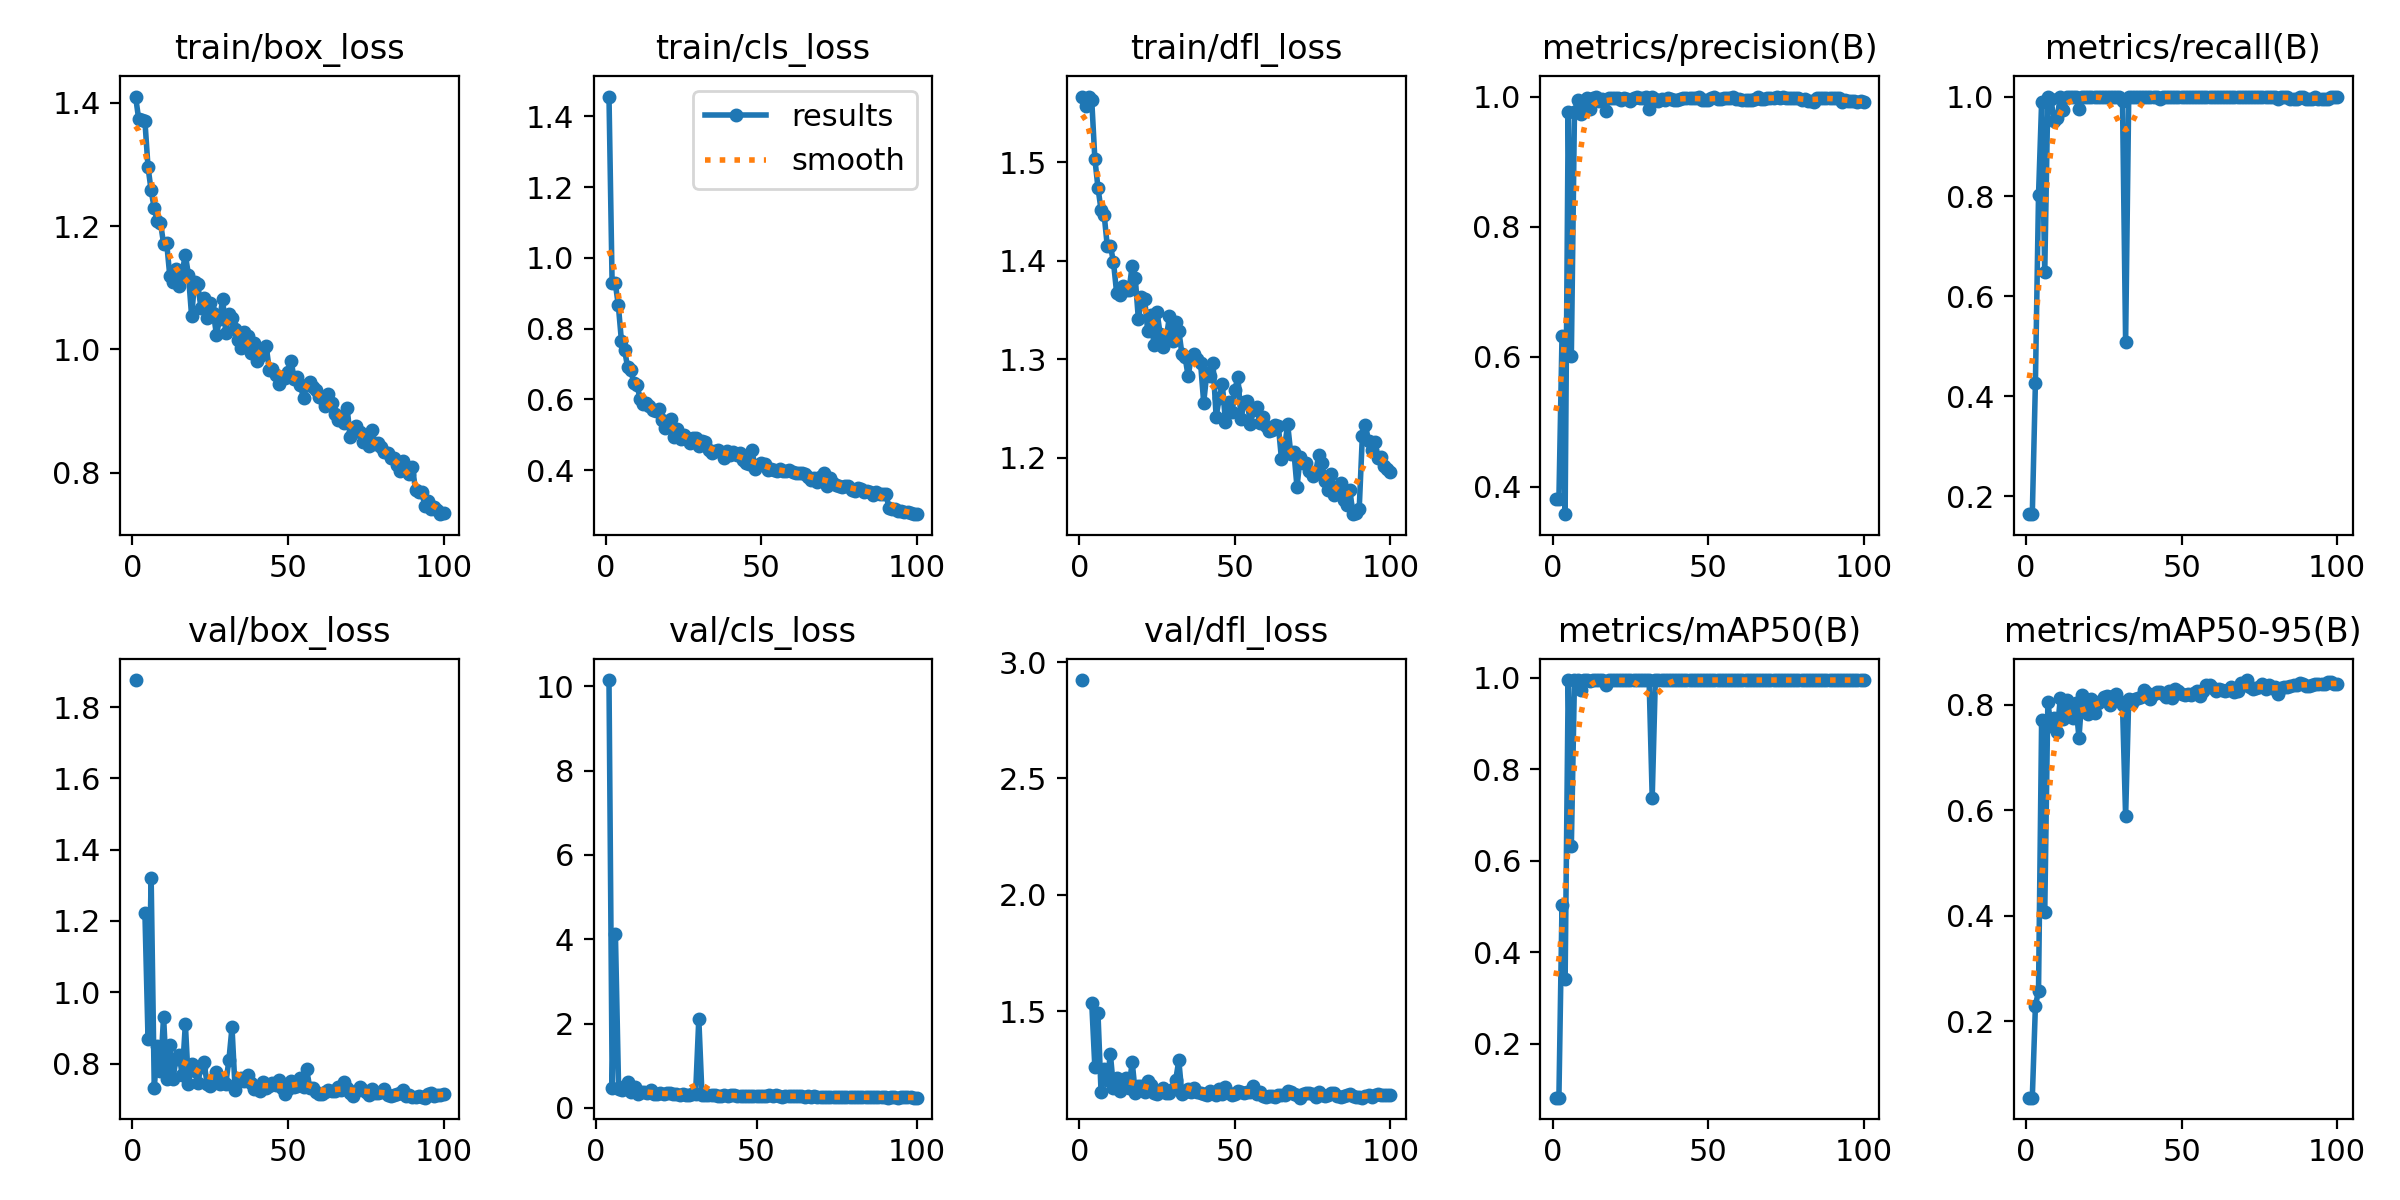

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=path + '/results.png', width=600)

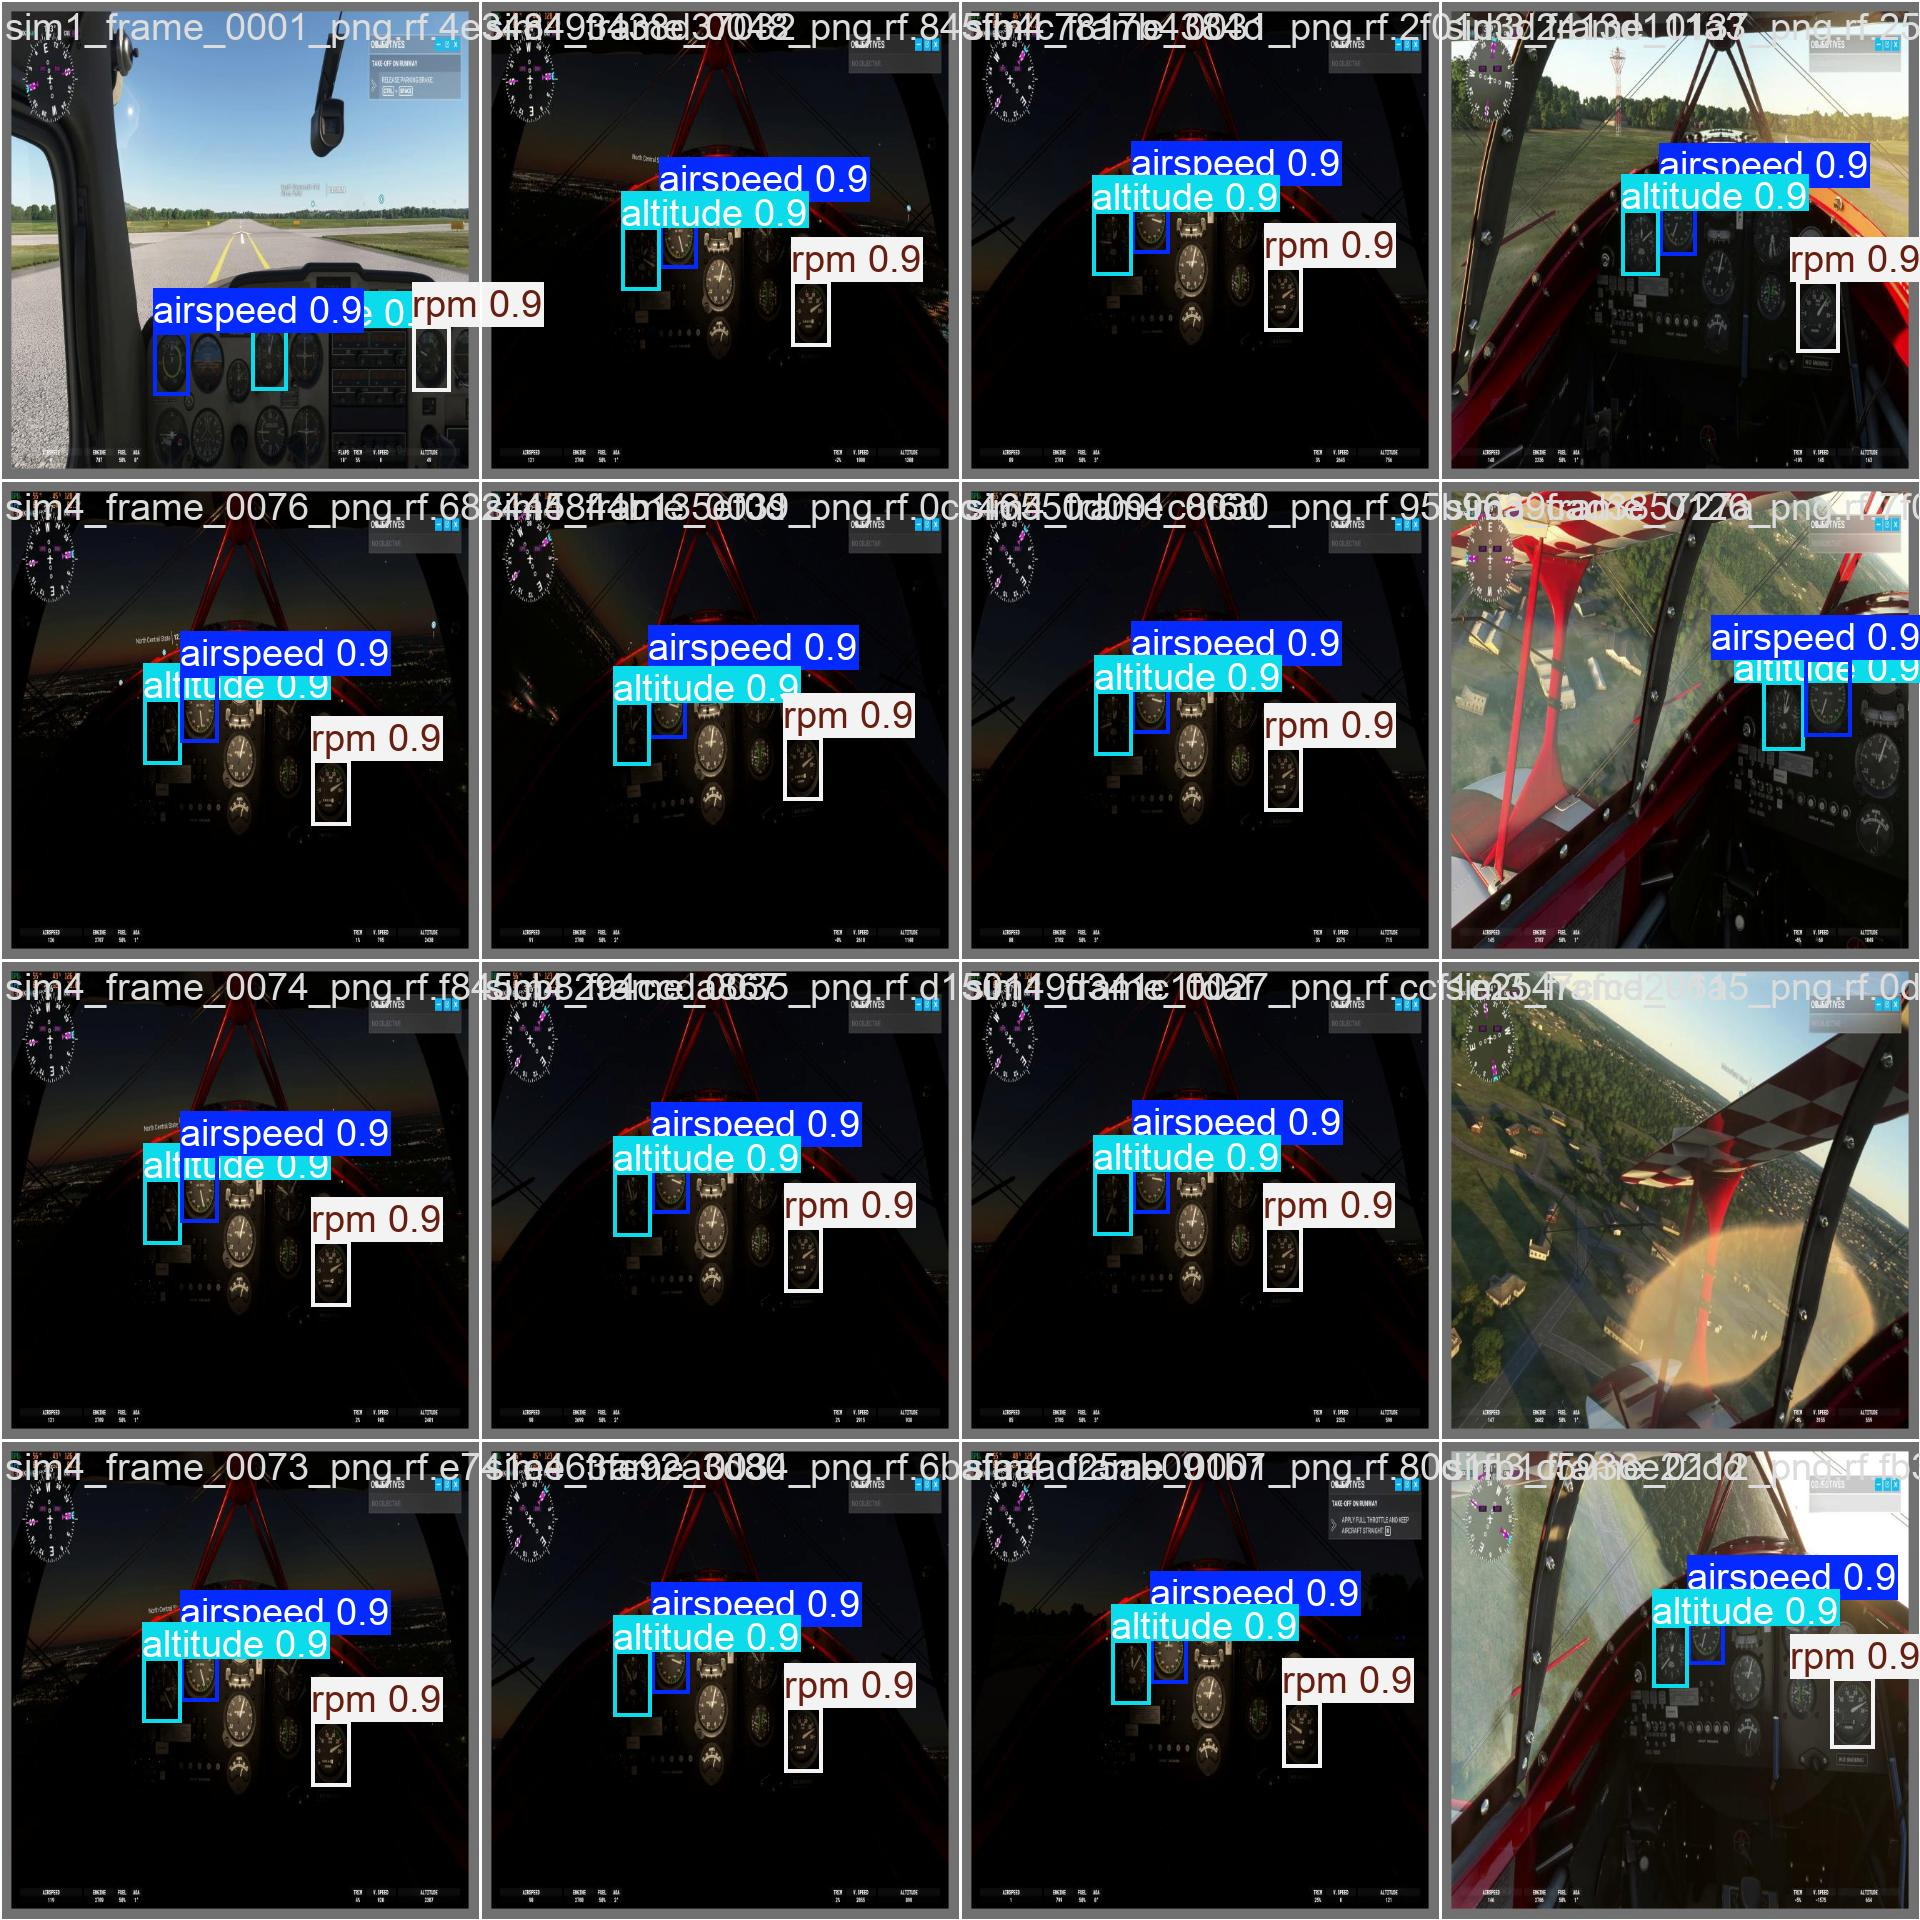

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=path + '/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,421,701 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/两点钟模型-3/valid/labels.cache... 259 images, 0 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/两点钟模型-3/valid/images/08_21C_0250_jpg.rf.b164fca68a7a644a126019aa776912c1.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.59it/s]
                   all        259       4652      0.987      0.979      0.991      0.749
                  bag1        258        258      0.986      0.984      0.994       0.78
                  bag2        257        257      0.998          1      0.995      0.892
                  bag3        250        250          1      0.942      0.995      0.808
                  bag4        258        258      0.996          1      0.995      0

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

**NOTE:** Let's take a look at few results.

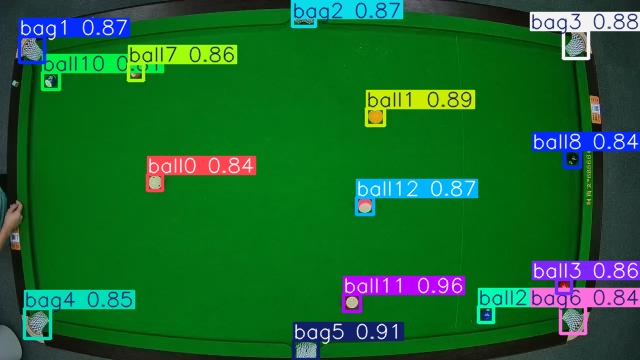

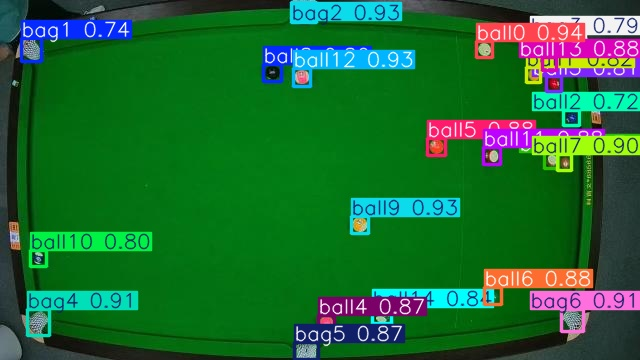

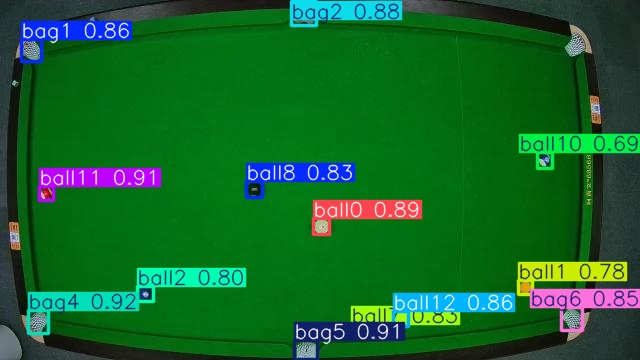

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [11]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=path)

View the status of your deployment at: https://app.roboflow.com/seniordesign-neufu/dials-3dlwi/2
Share your model with the world at: https://universe.roboflow.com/seniordesign-neufu/dials-3dlwi/model/2


In [ ]:
#!pip install inference

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, ROBOFLOW_API_KEY)

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.